## Hand-Written Digit Reader
## Richard Cooke
## G00331787

### Approach of this notebook was based this work: https://www.ics.uci.edu/~mohamadt/keras_mnist.html#Load-data-set.

## Making The Necessary Imports

In [2]:
# Used to 
import numpy as np
import matplotlib.pyplot as plt

# Used to create the Neural network
import keras as kr
import gzip

Using TensorFlow backend.


## Loading and Decompressing the dataset

In [3]:
# Importing the the mnist dataset
# Dataset used by the neural network
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# Reshaping the data using normalisation
# Original data is [0-255]. Scale it to range [0,1].
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)
train_img = train_img/255
test_img = test_img/255 

# mnist dataset contains 10 different digits
digits= 10

# Passed the labels to one hot vecotrs with a vector size of 10
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

print("One hot vector at index 0 of training labels ", train_lbl[5])

One hot vector at index 0 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Displaying the images from the datasets

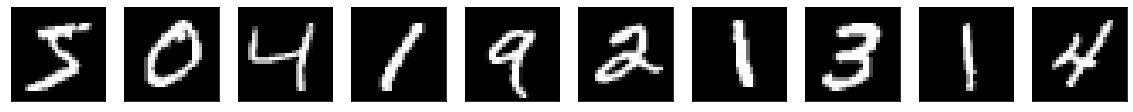

In [10]:
# Plotting examples of the data in the set
plt.figure(1, figsize=(20,5))

# For loop that will iterate 10 times, once for each digit in the set
for i in range(10):
    plt.subplot(1,10,i+1)
    
    #shows the relevant image
    plt.imshow(train_img[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    # Removing label markings from both the x and y axis'
    plt.xticks([])
    plt.yticks([])

In [ ]:
# Creating the neural netwrok by using the models import from keras
model = kr.models.Sequential()



In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])